## Customer Shopping Trends


### Import Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Global Options

In [24]:
# Set display configuration

### Data Preparation

- Start loading the dataset and prepare it for analysis

In [25]:
# Import the dataset
df = pd.read_csv("assets/data/shopping_trends.csv")

# Explore the dataset
df.head(200)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,51,Male,Jacket,Outerwear,25,New York,M,Magenta,Fall,4.3,Yes,Credit Card,Free Shipping,Yes,Yes,34,Credit Card,Monthly
196,197,38,Male,Boots,Footwear,88,Washington,M,Lavender,Summer,3.9,Yes,Cash,Next Day Air,Yes,Yes,41,Credit Card,Fortnightly
197,198,59,Male,Scarf,Accessories,78,South Carolina,M,Black,Fall,3.2,Yes,Debit Card,2-Day Shipping,Yes,Yes,41,Credit Card,Monthly
198,199,57,Male,Jewelry,Accessories,45,Utah,M,Turquoise,Winter,4.8,Yes,Cash,Standard,Yes,Yes,39,Credit Card,Fortnightly


- Check for missing data, outliers, data types, and duplicates

In [26]:
# Check for missing data
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [27]:
# Check for outliers
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [28]:
# Check for duplicates
print("DUPLICATES:" + str(df.duplicated().sum()))

DUPLICATES:0


In [29]:
# Check for data types
df.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

- Check the shape of the dataset

In [30]:
# Check the shape of the dataset
df.shape

(3900, 19)

- Checking the number of columns in the dataset

In [31]:
# Check the number of columns in the dataset
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

- Information about the dataset

In [32]:
# Check the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

### Business Questions

#### 1. What is the average age of the customers in the dataset?

- Visualize the average age of the customers
- Print the average age of the customers

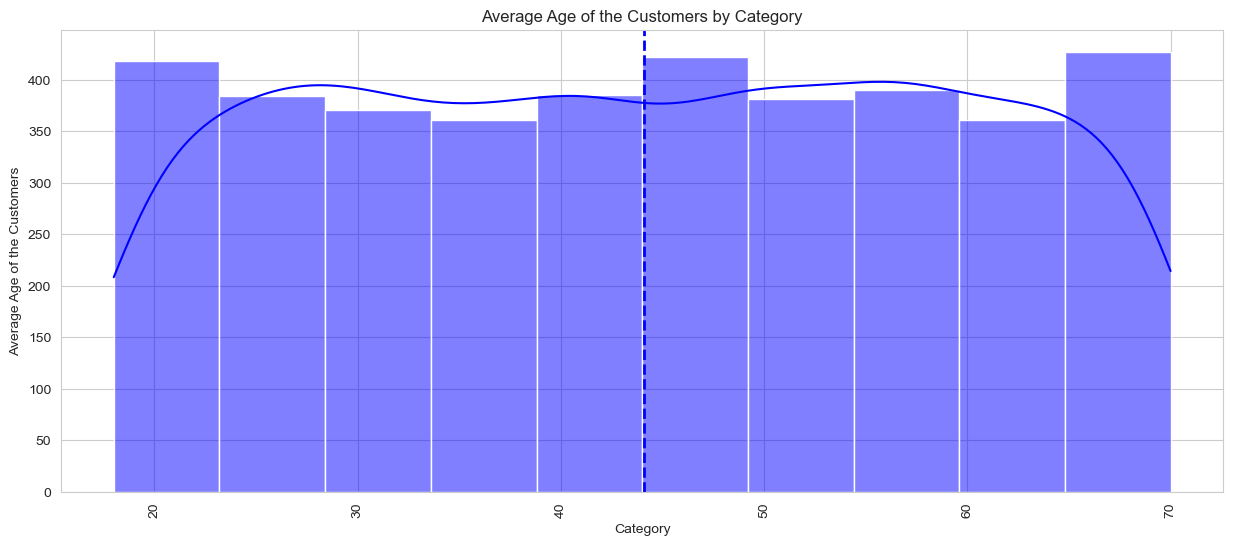

In [33]:
# Calculate the average age
average_age = df['Age'].mean()

# Visualize the average age of the customers (use Seaborn)
plt.figure(figsize=(15, 6))
sns.histplot(x='Age', data=df, bins=10, kde=True, color='b')

# Add a title and show the plot
plt.title("Average Age of the Customers by Category")
plt.xlabel("Category")
plt.ylabel("Average Age of the Customers")
plt.xticks(rotation=90)

# Add a horizontal line for the average age
plt.axvline(average_age, color='b', linestyle='dashed', linewidth=2, label=f'Average Age ({average_age:.2f} years)')

# Show the plot
plt.show()

In [34]:
# Calculate the average age of the customers
average_age = df['Age'].mean()

# Print the average age
print("The average age of the customers is: " + str(round(average_age, 2)))

The average age of the customers is: 44.07


#### 2. How many different items have been purchased by customers?

- Calculates the number of different items purchased by customers and prints it.
- Creates a bar plot using Seaborn to visualize the count of each item purchased.
- Rotates the x-axis labels for better readability.
- Displays the count of each item above the bars in the plot for reference.

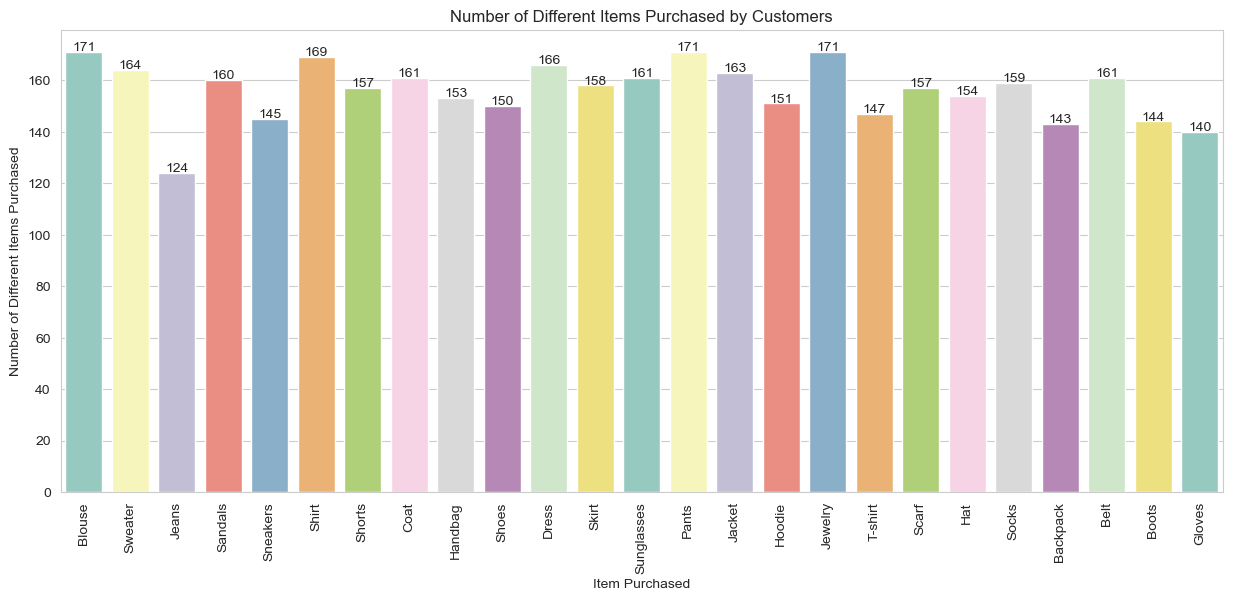

In [35]:
# Visualize the number of different items purchased by customers (use Seaborn)
plt.figure(figsize=(15, 6))
sns.countplot(x='Item Purchased', data=df, palette="Set3")

# Add a title and show the plot
plt.title("Number of Different Items Purchased by Customers")
plt.xlabel("Item Purchased")
plt.ylabel("Number of Different Items Purchased")
plt.xticks(rotation=90)

# Add the count of each item above the bars
for p in plt.gca().patches:
    plt.gca().annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.5))
    
# Show the plot
plt.show()

In [36]:
# Calculate the number of unique items
unique_items = df['Item Purchased'].nunique()

# Print the number of unique items
print("The number of unique items is: " + str(unique_items))

The number of unique items is: 25


#### 3. What is the most popular category of items purchased?

- Calculates the count of items in each category.
- Identifies the most popular category by finding the category with the highest count.
- Creates a bar plot using Seaborn to visualize the popularity of item categories.
- Rotates x-axis labels for better readability.
- Annotates the most popular category in the plot.

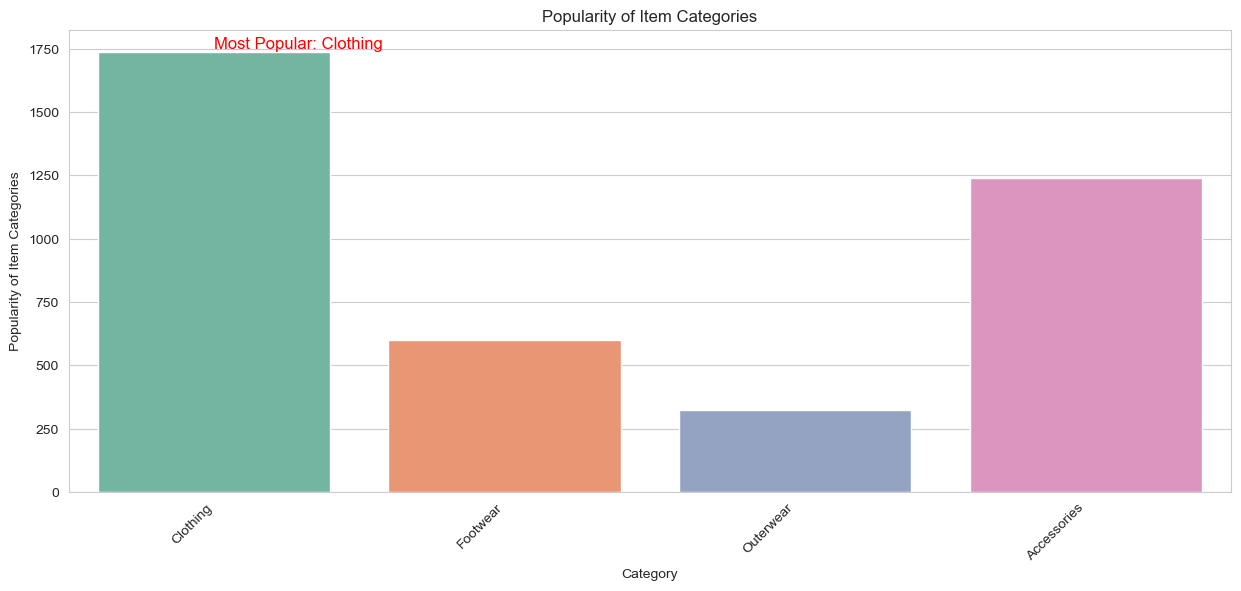

In [37]:
# Calculate the count of items in each category
category_counts = df['Category'].value_counts()

# Find the most popular category
most_popular_category = category_counts.idxmax()

# Visualize the popularity of item categories (use Seaborn)
plt.figure(figsize=(15, 6))
sns.countplot(x='Category', data=df, palette="Set2")

# Add a title and show the plot
plt.title("Popularity of Item Categories")
plt.xlabel("Category")
plt.ylabel("Popularity of Item Categories")
plt.xticks(rotation=45, horizontalalignment='right')

# Annotate the most popular category
plt.text(category_counts.index.get_loc(most_popular_category),
         category_counts.max(), f'Most Popular: {most_popular_category}',
         ha='left', va='bottom', fontsize=12, color='red')

# Show the plot
plt.show()

In [38]:
# Calculate the most popular category of items purchased
most_popular_category = df['Category'].value_counts().idxmax()

# Print the most popular category of items purchased
print("The most popular category of items purchased is: " + str(most_popular_category))

The most popular category of items purchased is: Clothing


#### 4. What is the average purchase amount (USD) in the dataset?

- Visualize the average purchase amount (USD)
- Print the average purchase amount (USD)

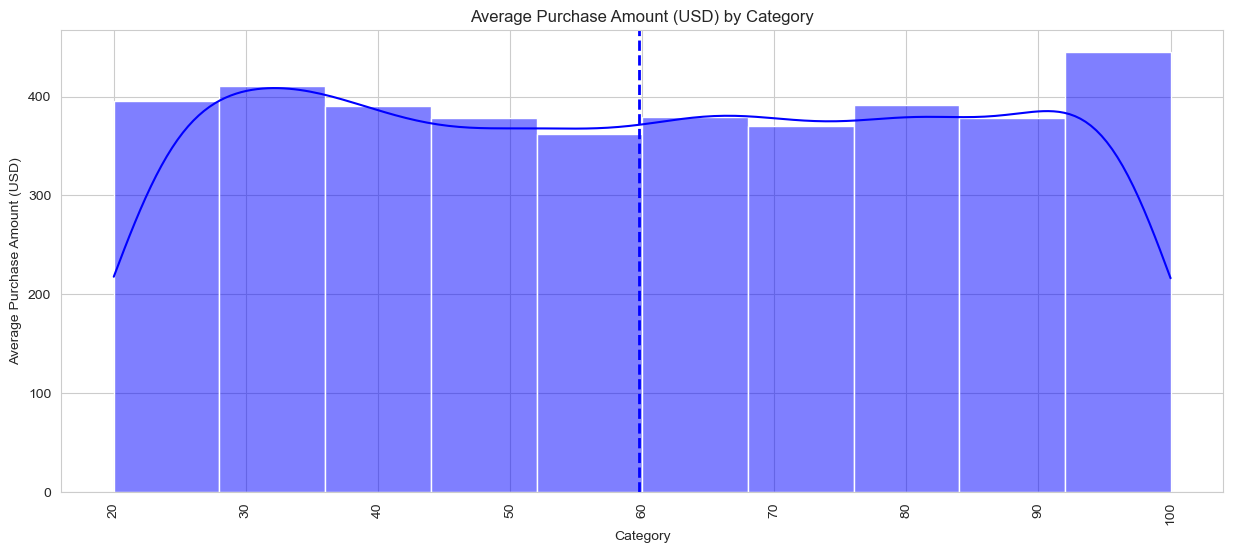

In [39]:
# Calculate the average purchase amount (USD)
average_purchase_amount = df['Purchase Amount (USD)'].mean()

# Visualize the average purchase amount (USD) (use Seaborn)
plt.figure(figsize=(15, 6))
sns.histplot(x='Purchase Amount (USD)', data=df, bins=10, kde=True, color='b')

# Add a title and show the plot
plt.title("Average Purchase Amount (USD) by Category")
plt.xlabel("Category")
plt.ylabel("Average Purchase Amount (USD)")
plt.xticks(rotation=90)

# Add a vertical line for the average purchase amount (USD)
plt.axvline(average_purchase_amount, color='b', linestyle='dashed', linewidth=2, label=f'Average Purchase Amount (USD) ({average_purchase_amount:.2f})')

# Show the plot
plt.show()

In [40]:
# Calculate the average purchase amount (USD)
average_purchase_amount = df['Purchase Amount (USD)'].mean()

# Print the average purchase amount (USD)
print("The average purchase amount (USD) is: " + str(round(average_purchase_amount, 2)))

The average purchase amount (USD) is: 59.76


#### 5. What location has the highest number of customers?

- Visualize the location with the highest number of customers
- Print the location with the highest number of customers

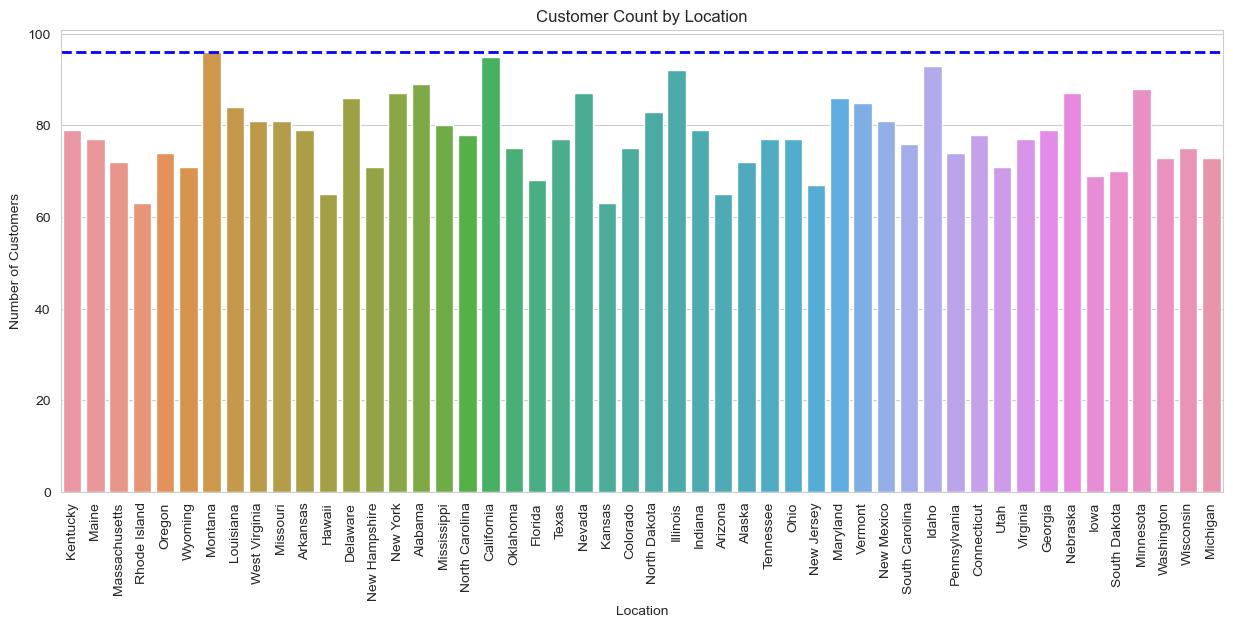

In [41]:
# Visualize the location with the highest number of customers (use Seaborn)
plt.figure(figsize=(15, 6))
sns.countplot(x='Location', data=df)

# Add a title and show the plot
plt.title("Customer Count by Location")
plt.xlabel("Location")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)

# Highlight the location with the highest number of customers
plt.axhline(y=df['Location'].value_counts().max(), color='b', linestyle='dashed', linewidth=2, label=f'Location with the Highest Number of Customers ({df["Location"].value_counts().max()})')

# Show the plot
plt.show()

In [42]:
# Calculate the location with the highest number of customers
location_with_highest_customers = df['Location'].value_counts().idxmax()

# Print the location with the highest number of customers
print("The location with the highest number of customers is: " + str(location_with_highest_customers))

The location with the highest number of customers is: Montana


#### 6. What is the most common size for clothing items purchased?

- Filters the dataset to include only clothing items.
- Calculates the count of each size for clothing items.
- Identifies the most common size by finding the size with the highest count.
- Creates a bar plot using Seaborn to visualize the most common clothing sizes.

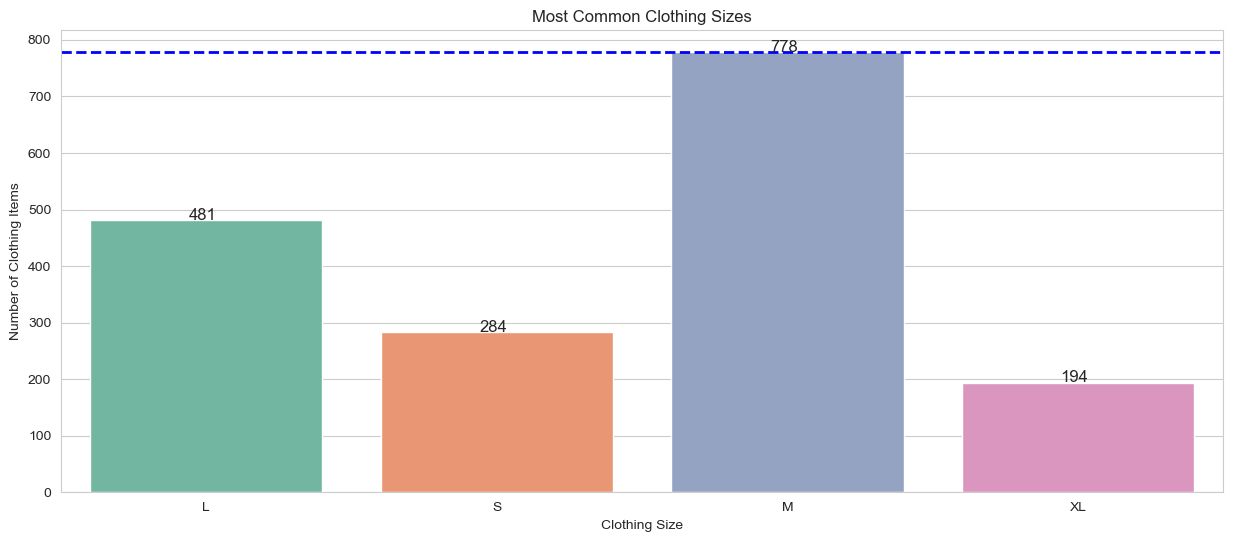

In [43]:
# Filter the dataset to include only clothing items
clothing_df = df[df['Category'] == 'Clothing']

# Visualize the most common clothing sizes (use Seaborn)
plt.figure(figsize=(15, 6))
sns.countplot(x='Size', data=clothing_df, palette="Set2")

# Add a title and show the plot
plt.title("Most Common Clothing Sizes")
plt.xlabel("Clothing Size")
plt.ylabel("Number of Clothing Items")

# Highlight the most common clothing size
plt.axhline(y=clothing_df['Size'].value_counts().max(), color='b', linestyle='dashed', linewidth=2, label=f'Most Common Clothing Size ({clothing_df["Size"].value_counts().max()})')

# Add the count of each size above the bars, make the font size bigger
for p in plt.gca().patches:
    plt.gca().annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.34, p.get_height()+0.5), fontsize=12)

# Show the plot
plt.show()

In [44]:
# Calculate the most common size for clothing items
most_common_size = df[df['Category'] == 'Clothing']['Size'].value_counts().idxmax()

# Print the most common size for clothing items
print("The most common size for clothing items is: " + str(most_common_size))

The most common size for clothing items is: M


#### What is the most common color of items purchased?

- Calculates the count of each color for items purchased.
- Identifies the most common color by finding the color with the highest count.
- Creates a bar plot using Seaborn to visualize the most common item colors.
- Rotates x-axis labels for better readability.
- Displays the count of each color above the bars in the plot for reference.
- Displays the percentage of each color above the bars in the plot for reference.
- Prints the most common color of items purchased.


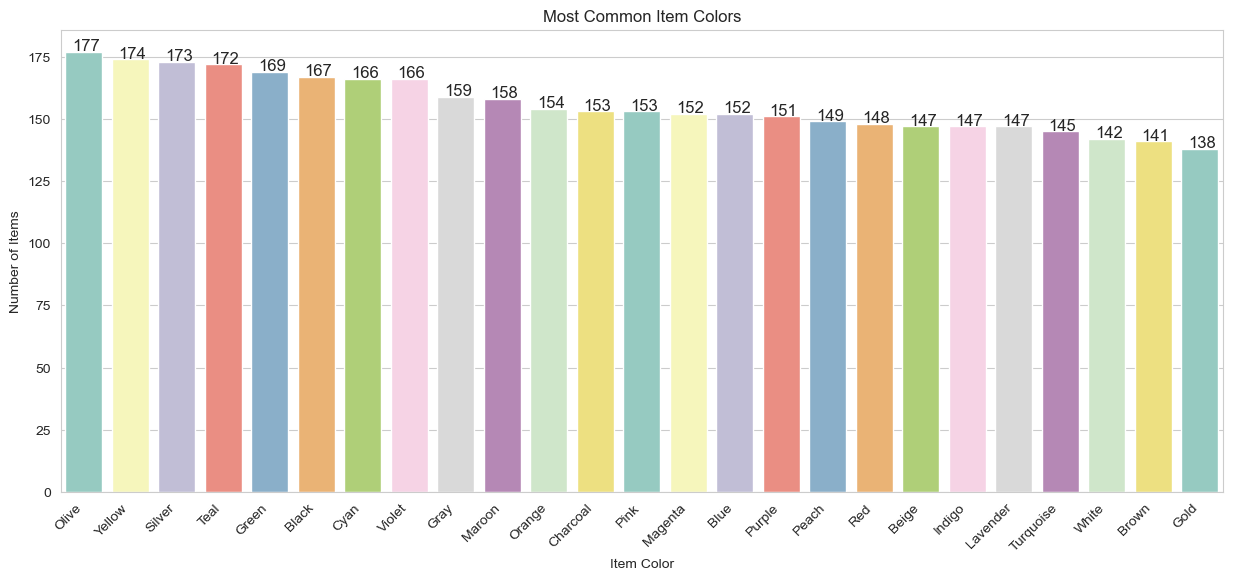

In [57]:
# Calculate the count of each color for items purchased
color_counts = df['Color'].value_counts()

# Find the most common color
most_common_color = color_counts.idxmax()

# Visualize the most common item colors (use Seaborn)
plt.figure(figsize=(15, 6))
sns.barplot(x=color_counts.index, y=color_counts, data=df, palette='Set3')

# Add a title and show the plot
plt.title("Most Common Item Colors")
plt.xlabel("Item Color")
plt.ylabel("Number of Items")
plt.xticks(rotation=45, horizontalalignment='right')

# Add the count of each color above the bars, make the font size bigger
for p in plt.gca().patches:
    plt.gca().annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.5), fontsize=12)
    
# Show the plot
plt.show()

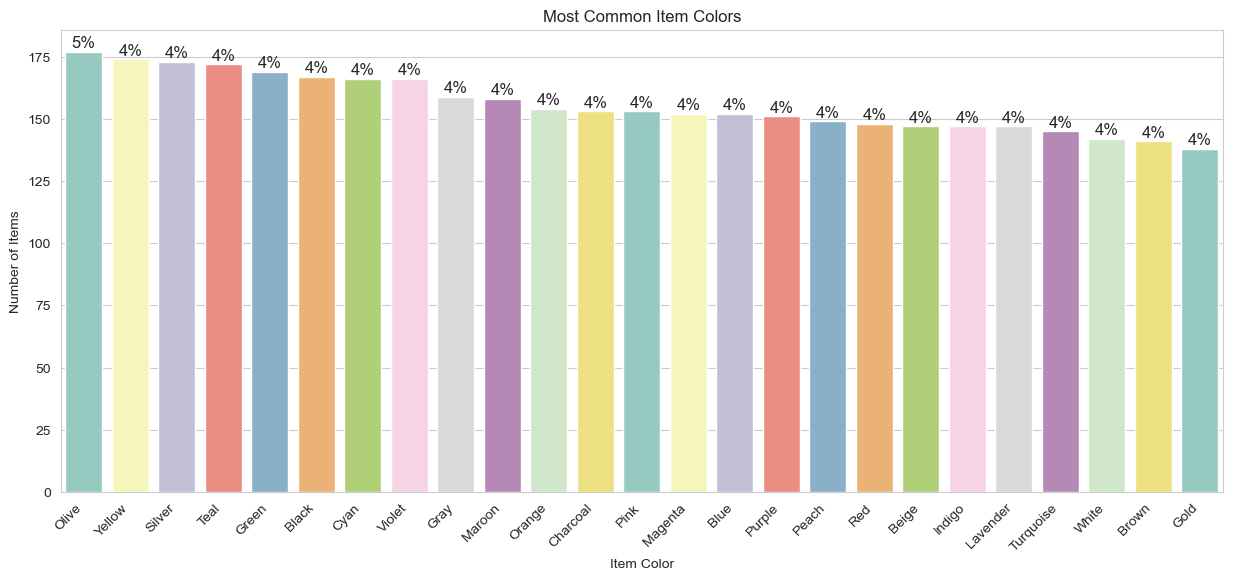

In [56]:
# Calculate the count of each color for items purchased
color_counts = df['Color'].value_counts()

# Find the most common color
most_common_color = color_counts.idxmax()

# Visualize the most common item colors (use Seaborn)
plt.figure(figsize=(15, 6))
sns.barplot(x=color_counts.index, y=color_counts, data=df, palette='Set3')

# Add a title and show the plot
plt.title("Most Common Item Colors")
plt.xlabel("Item Color")
plt.ylabel("Number of Items")
plt.xticks(rotation=45, horizontalalignment='right')

# Add the percentage of each color above the bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x()+p.get_width()/2., height + 0.5, '{:.0f}%'.format(height/df['Color'].value_counts().sum()*100), ha='center', va='bottom', fontsize=12)
    
# Show the plot
plt.show()

In [58]:
# Print the most common color of items purchased
print("The most common color of items purchased is: " + str(most_common_color))

The most common color of items purchased is: Olive


#### 8. Which season is associated with the highest review rating on average?

- Group the dataset by the "Season" column and calculate the average review ratings for each season.
- Find the season with the highest average review rating by identifying the maximum value.
- Create a bar plot using Seaborn to visualize the average review ratings by season.
- Highlight the season with the highest average review rating.
- Annotate the season with the highest average review rating on the plot.

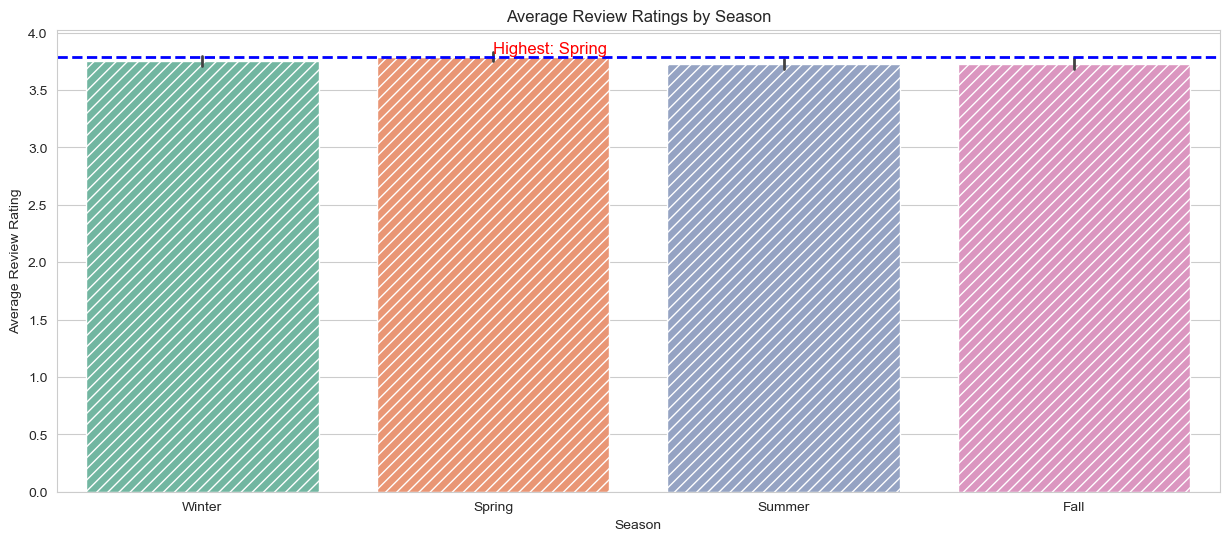

In [67]:
# Group the dataset by the "Season" column and calculate the average review ratings for each season
season_review_ratings = df.groupby('Season')['Review Rating'].mean()

# Find the season with the highest average review rating
season_with_highest_review_rating = season_review_ratings.idxmax()

# Visualize the average review ratings by season (use Seaborn)
plt.figure(figsize=(15, 6))
sns.barplot(x='Season', y='Review Rating', data=df, palette='Set2', errwidth=2, hatch='///')

# Add a title and show the plot
plt.title("Average Review Ratings by Season")
plt.xlabel("Season")
plt.ylabel("Average Review Rating")

# Highlight the season with the highest average review rating
plt.axhline(y=season_review_ratings.max(), color='b', linestyle='dashed', linewidth=2, label=f'Highest Average Review Rating ({season_review_ratings.max():.2f})')

# Annotate the season with the highest average review rating
plt.text(season_review_ratings.index.get_loc(season_with_highest_review_rating),
         season_review_ratings.max(), f'Highest: {season_with_highest_review_rating}',
         ha='left', va='bottom', fontsize=12, color='red')

# Show the plot
plt.show()

#### 9. What is the most common payment method used by customers?

- Calculates the count of each payment method used by customers.
- Identifies the most common payment method by finding the payment method with the highest count.
- Creates a bar plot using Seaborn to visualize the most common payment methods.
- Add highlights to the plot to indicate the most common payment method.
- Displays the count of each payment method above the bars in the plot for reference.
- Prints the most common payment method used by customers.
- Prints the percentage of customers who used the most common payment method.


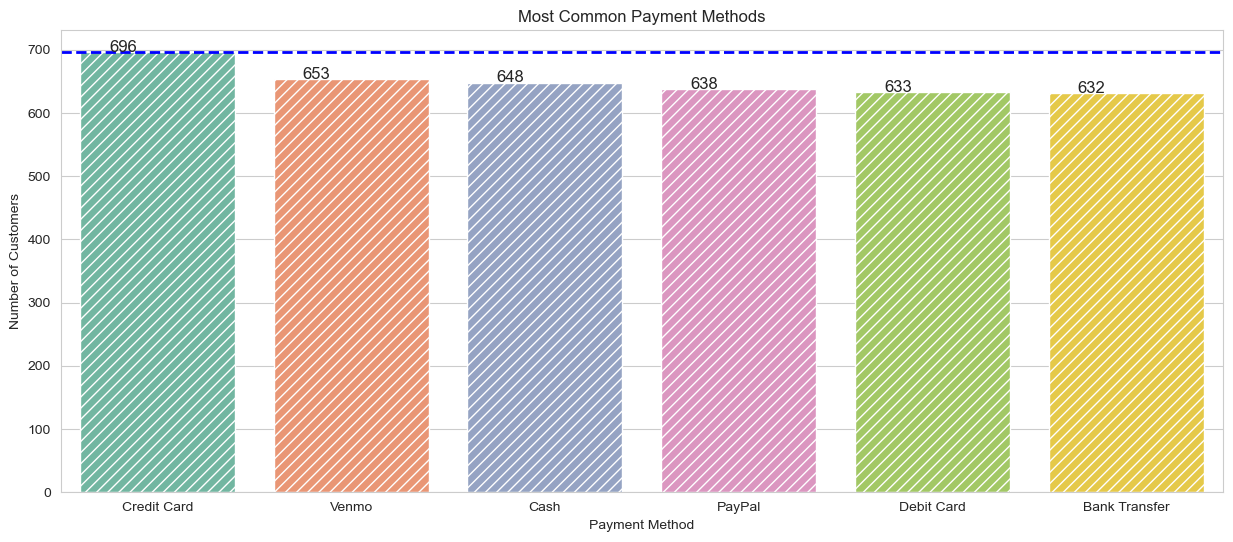

In [76]:
# Calculate the count of each payment method used by customers
payment_method_counts = df['Payment Method'].value_counts()

# Find the most common payment method
most_common_payment_method = payment_method_counts.idxmax()

# Visualize the most common payment methods (use Seaborn)
plt.figure(figsize=(15, 6))
sns.barplot(x=payment_method_counts.index, y=payment_method_counts, data=df, palette='Set2', hatch='///')

# Add a title and other labels
plt.title("Most Common Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")

# Highlight the most common payment method
plt.axhline(y=payment_method_counts.max(), color='b', linestyle='dashed', linewidth=2, label=f'Most Common Payment Method ({payment_method_counts.max()})')

# Add the count of each payment method above the bars, make the font size bigger
for p in plt.gca().patches:
    plt.gca().annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.5), fontsize=12)
    
# Show the plot
plt.show()